In [1]:
import tensorflow as tf
from keras import layers, models, callbacks, Model
from keras.layers import concatenate, Input, Conv2D, MaxPooling2D, BatchNormalization, AveragePooling2D, Flatten, Dropout, Dense
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from PIL import Image

### Inception 

In [2]:
def inception_v1(input_shape=(224,224,1), classes=1000):
    input = Input(shape=input_shape)

    # First Block
    conv1 = Conv2D(64, (7,7), strides=(2,2), padding='same', activation='relu')(input)
    pool1 = MaxPooling2D((3,3), strides=(2,2), padding='same')(conv1)
    norm1 = BatchNormalization()(pool1)

    # Second Block
    conv2_reduce = Conv2D(64, (1,1), padding='same', activation='relu')(norm1)
    conv2 = Conv2D(192, (3,3), padding='same', activation='relu')(conv2_reduce)
    norm2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D((3,3), strides=(2,2), padding='same')(norm2)

    # Inception Block 3a
    conv3a_reduce = Conv2D(64, (1,1), padding='same', activation='relu')(pool2)
    conv3a = Conv2D(128, (3,3), padding='same', activation='relu')(conv3a_reduce)
    norm3a = BatchNormalization()(conv3a)

    # Inception Block 3b
    conv3b_reduce = Conv2D(32, (1,1), padding='same', activation='relu')(pool2)
    conv3b = Conv2D(96, (3,3), padding='same', activation='relu')(conv3b_reduce)
    norm3b = BatchNormalization()(conv3b)
    pool3b = MaxPooling2D((3,3), strides=(1,1), padding='same')(norm3b)

    # Concatenate Block 3a and 3b
    inception3 = concatenate([norm3a, pool3b])

    # Inception Block 4a
    conv4a_reduce = Conv2D(128, (1,1), padding='same', activation='relu')(inception3)
    conv4a = Conv2D(256, (3,3), padding='same', activation='relu')(conv4a_reduce)
    norm4a = BatchNormalization()(conv4a)

    # Inception Block 4b
    conv4b_reduce = Conv2D(64, (1,1), padding='same', activation='relu')(inception3)
    conv4b = Conv2D(128, (3,3), padding='same', activation='relu')(conv4b_reduce)
    norm4b = BatchNormalization()(conv4b)
    pool4b = MaxPooling2D((3,3), strides=(1,1), padding='same')(norm4b)

    # Concatenate Block 4a and 4b
    inception4 = concatenate([norm4a, pool4b])

    # Inception Block 4c
    conv4c_reduce = Conv2D(64, (1,1), padding='same', activation='relu')(inception4)
    conv4c = Conv2D(128, (3,3), padding='same', activation='relu')(conv4c_reduce)
    norm4c = BatchNormalization()(conv4c)
    pool4c = MaxPooling2D((3, 3), strides=(1,1), padding='same')(norm4c)
                           
    # Concatenate Block 4a and 4b
    inception4 = concatenate([norm4a, pool4b, pool4c])

    # Inception Block 4d
    conv4d_reduce = Conv2D(256, (1,1), padding='same', activation='relu')(inception4)
    conv4d = Conv2D(512, (3,3), padding='same', activation='relu')(conv4d_reduce)
    norm4d = BatchNormalization()(conv4d)

    # Inception Block 4e
    conv4e_reduce = Conv2D(128, (1,1), padding='same', activation='relu')(inception4)
    conv4e = Conv2D(256, (3,3), padding='same', activation='relu')(conv4e_reduce)
    norm4e = BatchNormalization()(conv4e)
    pool4e = MaxPooling2D((3,3), strides=(1,1), padding='same')(norm4e)

    # Concatenate Block 4d and 4e
    inception4 = concatenate([norm4d, pool4e])

    # Inception Block 5a
    conv5a_reduce = Conv2D(256, (1,1), padding='same', activation='relu')(inception4)
    conv5a = Conv2D(512, (3,3), padding='same', activation='relu')(conv5a_reduce)
    norm5a = BatchNormalization()(conv5a)

    # Inception Block 5b
    conv5b_reduce = Conv2D(128, (1,1), padding='same', activation='relu')(inception4)
    conv5b = Conv2D(256, (3,3), padding='same', activation='relu')(conv5b_reduce)
    norm5b = BatchNormalization()(conv5b)
    pool5b = MaxPooling2D((3,3), strides=(1,1), padding='same')(norm5b)

    # Concatenate Block 5a and 5b
    inception5 = concatenate([norm5a, pool5b])

    # Average Pooling and Dropout
    avg_pool = AveragePooling2D((7,7), strides=(7,7), padding='same')(inception5)
    flatten = Flatten()(avg_pool)
    dropout = Dropout(0.4)(flatten)

    # Output layer
    output = Dense(classes, activation='softmax')(dropout)

    # Create model
    model = Model(inputs=input, outputs=output)

    return model

In [3]:
# Define the input shape
input_shape = (28, 28, 1)

In [4]:
# Define the model
model = inception_v1(input_shape, 10)

In [5]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Mnist

In [6]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
# Load the Fashion-MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)) / 255.0
test_images = test_images.reshape((10000, 28, 28, 1)) / 255.0

In [8]:
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)

# Train the model
model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels), callbacks=[early_stop])

Epoch 1/10
469/469 [==============================] - 294s 620ms/step - loss: 0.4876 - accuracy: 0.8252 - val_loss: 1.1950 - val_accuracy: 0.5414
Epoch 2/10
469/469 [==============================] - 310s 661ms/step - loss: 0.3185 - accuracy: 0.8850 - val_loss: 0.3610 - val_accuracy: 0.8699
Epoch 3/10
469/469 [==============================] - 239s 510ms/step - loss: 0.2767 - accuracy: 0.8993 - val_loss: 0.3114 - val_accuracy: 0.8896
Epoch 4/10
469/469 [==============================] - 239s 510ms/step - loss: 0.2556 - accuracy: 0.9069 - val_loss: 0.3235 - val_accuracy: 0.8853
Epoch 5/10
469/469 [==============================] - 236s 503ms/step - loss: 0.2352 - accuracy: 0.9132 - val_loss: 0.5530 - val_accuracy: 0.8312
Epoch 6/10
469/469 [==============================] - 238s 508ms/step - loss: 0.2229 - accuracy: 0.9178 - val_loss: 0.3212 - val_accuracy: 0.8817
Epoch 6: early stopping


In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 0.3212 - accuracy: 0.8817
Test accuracy: 0.8816999793052673


In [10]:
model.save('./saved_model.h5')


In [ ]:
#loaded_model = tf.keras.models.load_model('my_model.h5')

In [11]:
from keras.layers import concatenate
import tensorflow as tf

img_a_in = tf.keras.layers.Input(shape = train_images.shape[1:], name = 'ImageA_Input')
img_b_in = tf.keras.layers.Input(shape = train_images.shape[1:], name = 'ImageB_Input')

img_a_feat = model(img_a_in)
img_b_feat = model(img_b_in)

features = concatenate([img_a_feat, img_b_feat], name = 'merge_features')
features = tf.keras.layers.Dense(16, activation='linear')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(4, activation='linear')(features)
features = tf.keras.layers.BatchNormalization()(features)
features = tf.keras.layers.Activation('relu')(features)
features = tf.keras.layers.Dense(1, activation='sigmoid')(features)

siamese_model = tf.keras.models.Model(inputs = [img_a_feat, img_b_feat], outputs = [features], name = 'Siamese_model')
siamese_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['mae'])
siamese_model.summary()

Model: "Siamese_model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 merge_features (Concatenate)   (None, 20)           0           ['input_2[0][0]',                
                                                                  'input_3[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 16)           336         ['merge_features[1][0

In [12]:
train_groups = [train_images[np.where(train_labels==i)[0]] for i in np.unique(train_labels)]
test_groups = [test_images[np.where(test_labels==i)[0]] for i in np.unique(train_labels)]

In [13]:
print('train groups:', [x.shape[0] for x in train_groups])
print('test groups:', [x.shape[0] for x in test_groups])

train groups: [6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]
test groups: [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]


In [14]:
def gen_random_batch(in_groups, batch_halfsize = 8):
    out_img_a, out_img_b, out_score = [], [], []
    all_groups = list(range(len(in_groups)))
    for match_group in [True, False]:
        group_idx = np.random.choice(all_groups, size = batch_halfsize)
        out_img_a += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in group_idx]
        if match_group:
            b_group_idx = group_idx
            out_score += [1] * batch_halfsize
        else:
            # anything but the same group
            non_group_idx = [np.random.choice([i for i in all_groups if i != c_idx]) for c_idx in group_idx]
            b_group_idx = non_group_idx
            out_score += [0]*batch_halfsize

        out_img_b += [in_groups[c_idx][np.random.choice(range(in_groups[c_idx].shape[0]))] for c_idx in b_group_idx]
    return np.stack(out_img_a,0), np.stack(out_img_b,0), np.stack(out_score,0)

1/1 [==============================] - 0s 42ms/step


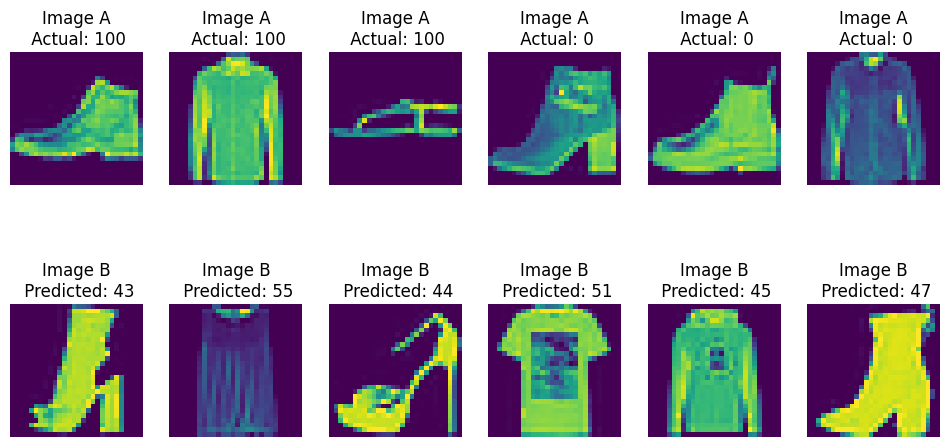

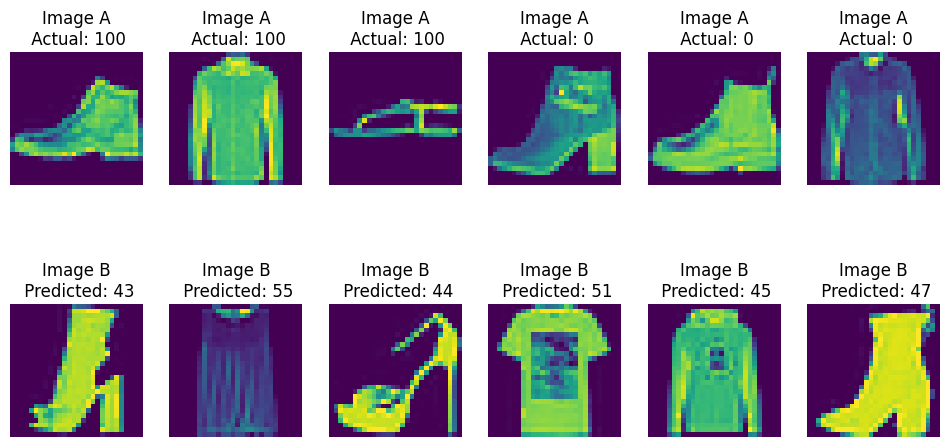

In [15]:
def show_model_output(nb_examples = 3):
    pv_a, pv_b, pv_sim = gen_random_batch(test_groups, nb_examples)
    pred_sim = siamese_model.predict([model.predict(pv_a), model.predict(pv_b)])
    fig, m_axs = plt.subplots(2, pv_a.shape[0], figsize = (12, 6))
    for c_a, c_b, c_d, p_d, (ax1, ax2) in zip(pv_a, pv_b, pv_sim, pred_sim, m_axs.T):
        ax1.imshow(c_a[:,:,0])
        ax1.set_title(f'Image A\n Actual: { 100 * c_d }')
        ax1.axis('off')
        ax2.imshow(c_b[:,:,0])
        ax2.set_title(f'Image B\n Predicted: {int( 100 * p_d[0] )}')
        ax2.axis('off')
    return fig
# a completely untrained model
show_model_output()

In [16]:
def siam_gen(in_groups, batch_size = 32):
    while True:
        pv_a, pv_b, pv_sim = gen_random_batch(in_groups, batch_size//2)
        yield [model.predict(pv_a), model.predict(pv_b)], pv_sim

valid_a, valid_b, valid_sim = gen_random_batch(test_groups, 1024)
loss_history = siamese_model.fit(siam_gen(train_groups),
    steps_per_epoch = 50,
    validation_data=([model.predict(valid_a), model.predict(valid_b)],
    valid_sim),
    epochs = 2,
    verbose = True)

1/1 [==============================] - 0s 34ms/step
Epoch 1/2
50/50 [==============================] - 8s 149ms/step - loss: 0.6923 - mae: 0.4707 - val_loss: 0.6722 - val_mae: 0.4877
Epoch 2/2
1/1 [==============================] - 0s 36ms/step


1/1 [==============================] - 0s 16ms/step


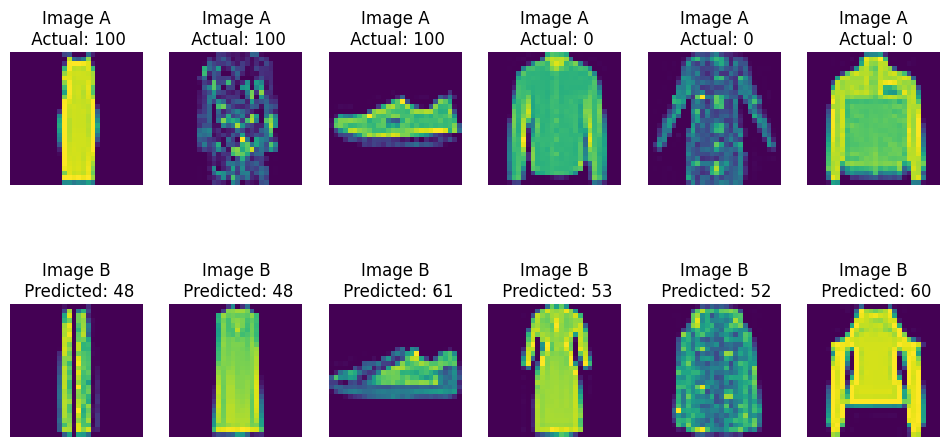

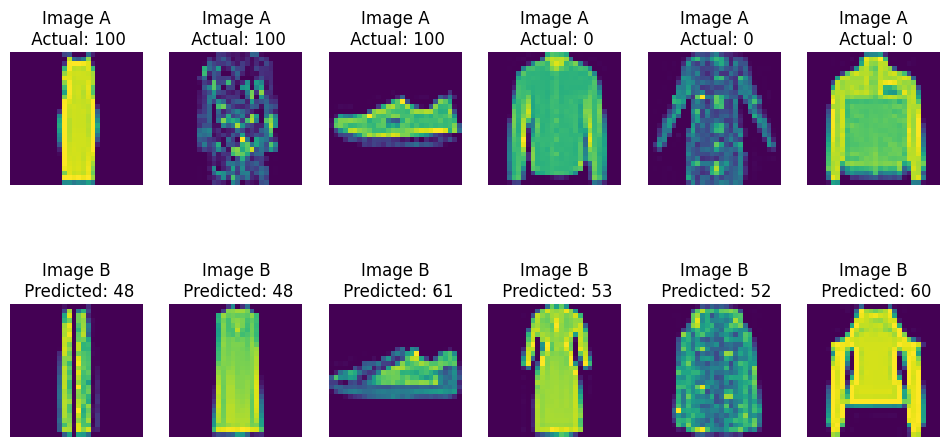

In [17]:
show_model_output()

In [18]:
%%time
x_test_features = model.predict(test_images, verbose = True, batch_size=128)

tsne_obj = TSNE(n_components=2,
    init='pca',
    random_state=101,
    method='barnes_hut',
    n_iter=500,
    verbose=1)
tsne_features = tsne_obj.fit_transform(x_test_features)

79/79 [==============================] - 5s 62ms/step
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.022s...
[t-SNE] Computed neighbors for 10000 samples in 0.339s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.012417
[t-SNE] KL divergence aft

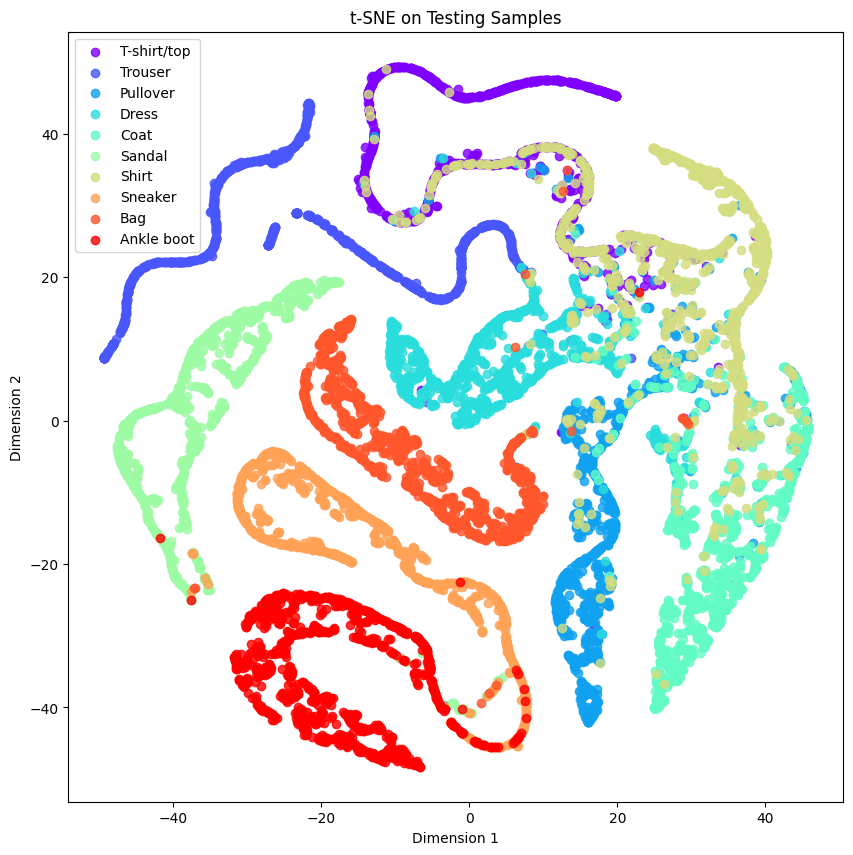

In [19]:
obj_categories = [  
                    'T-shirt/top','Trouser','Pullover','Dress',
                    'Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'
                 ]
colors = plt.cm.rainbow(np.linspace(0, 1, 10))
plt.figure(figsize=(10, 10))

for c_group, (c_color, c_label) in enumerate(zip(colors, obj_categories)):
    plt.scatter(tsne_features[np.where(test_labels == c_group), 0],
        tsne_features[np.where(test_labels == c_group), 1],
        marker='o',
        color=c_color,
        linewidth=1,
        alpha=0.8,
        label=c_label)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE on Testing Samples')
plt.legend(loc='best')
plt.savefig('clothes-dist.png')
plt.show(block=False)